<center><img src="../img/logo_hse_black.jpg"></center>

<h1><center>Data Analysis</center></h1>
<h2><center>Seminar: Linear Regression</center></h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

# Now, Linear regression

## House price

Load dataset about house price

In [2]:
df = pd.read_csv('dataset.csv', sep = '\t')
df.index = range(len(df))
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Median value of owner-occupied homes in 1000's dollars -- target variable

Split on train in test

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
df_train, df_test = train_test_split(df, test_size = 0.2, random_state = 42)

In [5]:
df_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
477,15.02340,0.0,18.10,0,0.6140,5.304,97.3,2.1007,24,666.0,20.2,349.48,24.91,12.0
15,0.62739,0.0,8.14,0,0.5380,5.834,56.5,4.4986,4,307.0,21.0,395.62,8.47,19.9
332,0.03466,35.0,6.06,0,0.4379,6.031,23.3,6.6407,1,304.0,16.9,362.25,7.83,19.4
423,7.05042,0.0,18.10,0,0.6140,6.103,85.1,2.0218,24,666.0,20.2,2.52,23.29,13.4
19,0.72580,0.0,8.14,0,0.5380,5.727,69.5,3.7965,4,307.0,21.0,390.95,11.28,18.2


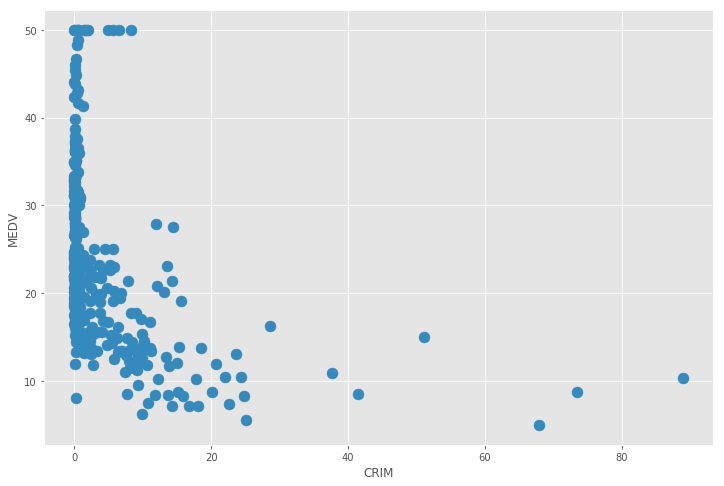

In [6]:
df_train.plot(x='CRIM', y='MEDV', kind='scatter', s=120)

How we see, less criminal higher price (surprise)

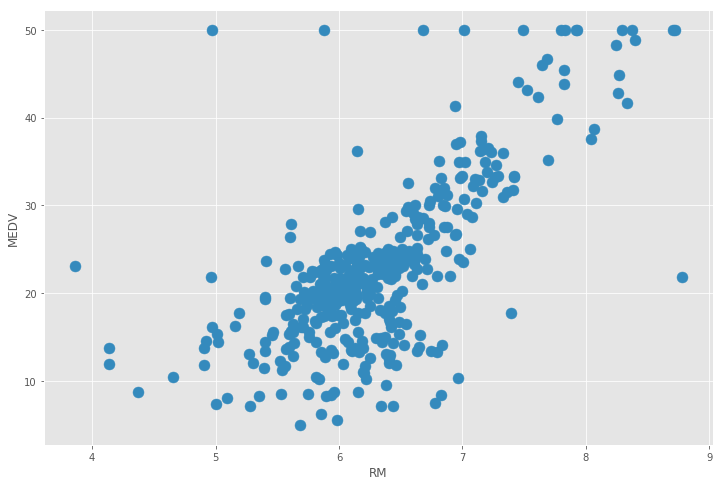

In [7]:
df_train.plot(x='RM', y='MEDV', kind='scatter', s=120)

RM - average number of rooms

Looks line there is linear dependence between rooms and price

In [8]:
X_train = df_train.RM.values.reshape(-1, 1)
y_train = df_train.MEDV.values

In [9]:
from sklearn.linear_model import LinearRegression

Обучим модель

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
print('Model:\nprice = %.2f + (%.2f)*rooms' % (model.intercept_, model.coef_[0]))

Model:
price = -36.25 + (9.35)*rooms


In [12]:
model.intercept_

-36.24631889813795

In [13]:
model.coef_

array([9.34830141])

### Question for student

What is the meaning in coefficients of linear regressions?

Plot your model line

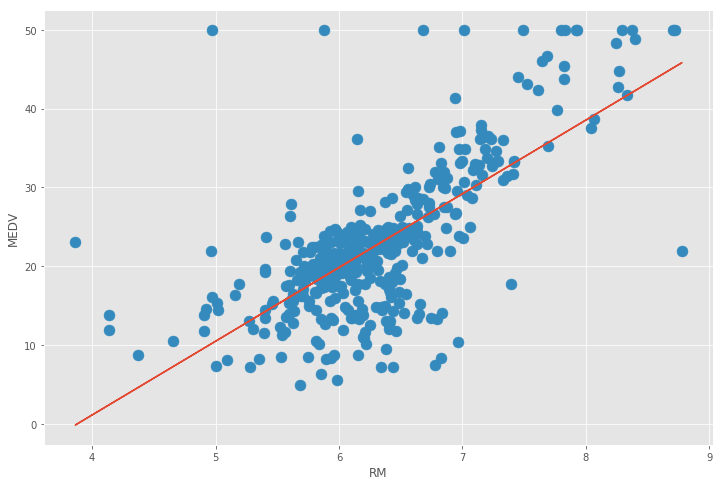

In [14]:
df_train.plot(x='RM', y='MEDV', kind='scatter', s=120)

y_hat = model.predict(X_train)

plt.plot(X_train, y_hat)

## Your Code Here

Let's use all features

In [15]:
X_train = df_train.drop(columns = ['MEDV']).values
y_train = df_train.MEDV.values

In [16]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### But how evaluate our model?

### Basic quality measures

In [17]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import m
from sklearn.metrics import r2_score

* $\frac{1}{N} \sum_n |\hat{y}_{n}-y_n|$ - mean absolute error
* $\frac{1}{N} \sum_n (\hat{y}_{n}-y_n)^2$ - mean squared error

In [18]:
y_hat = model.predict(X_train)

In [19]:
print('MAE %.2f' % mean_absolute_error(y_train, y_hat))
print('MSE %.2f' % mean_squared_error(y_train, y_hat))

MAE 3.31
MSE 21.64


Let's look on test

In [20]:
y_test = df_test.MEDV.values
y_hat = model.predict(df_test.drop(columns = ['MEDV']).values)

In [21]:
print('MAE %.2f' % mean_absolute_error(y_test, y_hat))
print('MSE %.2f' % mean_squared_error(y_test, y_hat))

MAE 3.19
MSE 24.29


Other measure is $R^2$:

$\bar{y}$ - mean value of y

$\hat{y}$ - predicted value of y

* $TSS = \sum_n (y_n-\bar{y})^2$ - total sum of squares
* $RSS = \sum_n (y_n-\hat{y}_n)^2$ - residual sum of squares
* $ESS = \sum_n (\hat{y}_n-\bar{y})^2$ - explained sum of squares

$$TSS = ESS + RSS$$

$R^2=1-\frac{RSS}{TSS}$


## Feature scaling

### Question for student

Why feature scaling is usefull?

Feature scaling improves GD performance, but replaces interpretability

Build a pipeline with Standart scaling and train a model

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

model = Pipeline([('scaler', StandardScaler()),
                  ('regressor', LinearRegression())])
model.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('regressor', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [24]:
print('Model :\nprice = %.2f + (%.2f)*rooms`' % (model.steps[1][1].intercept_, 
                                                   model.steps[1][1].coef_[0]))

Model :
price = 22.80 + (-1.00)*rooms`


Exist different scalers, for example you can use MinMaxScaler or others

## Gradient descent

In [25]:
# Просто для удобства
X_train = df_train.RM.values.reshape(-1, 1)
y_train = df_train.MEDV.values
X_train = (X_train - X_train.mean())/X_train.std()

In [26]:
# adding a column of "1" into matrix
X_model = np.c_[np.ones(X_train.shape), X_train]
X_model.shape

(404, 2)

In [27]:
X_model[:10]

array([[ 1.        , -1.42806858],
       [ 1.        , -0.68008655],
       [ 1.        , -0.40206304],
       [ 1.        , -0.30045039],
       [ 1.        , -0.83109424],
       [ 1.        ,  0.16245169],
       [ 1.        , -0.39359532],
       [ 1.        ,  0.09470992],
       [ 1.        , -0.23129734],
       [ 1.        ,  0.75660345]])

In [28]:
from mpl_toolkits import mplot3d

Text(0, 0.5, '$\\beta_1$')

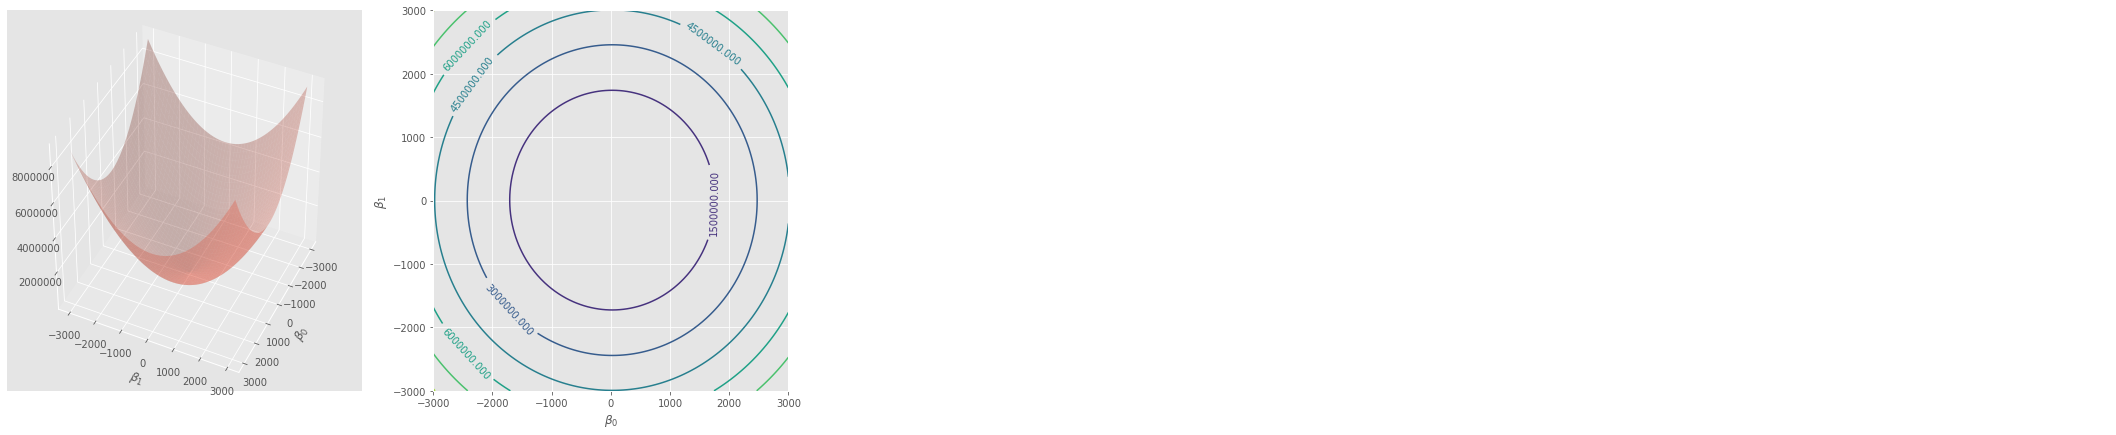

In [29]:
beta0 = np.linspace(-3000 , 3000, 100)
beta1 = np.linspace(-3000, 3000, 100)

B0, B1= np.meshgrid(beta0, beta1)

B_all = np.c_[B0.reshape(-1,1), B1.reshape(-1,1)].T

L = X_model.dot(B_all) - y_train.reshape(-1,1)
L = L ** 2
L = L.mean(axis=0)/2
L = L.reshape(B0.shape)


fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.view_init(40, 25)
ax.plot_surface(B0, B1, L, alpha=0.3,)
ax.set_xlabel(r'$\beta_0$')
ax.set_ylabel(r'$\beta_1$')

ax = fig.add_subplot(1, 2, 2)
contour = ax.contour(B0, B1, L)
plt.clabel(contour, inline=1, fontsize=10)
ax.set_xlabel(r'$\beta_0$')
ax.set_ylabel(r'$\beta_1$')

General steps:

* Set random initial $\beta$
* Until converged:
    * Calculate residuals and error
    * Calculate gradients
    * Update coefs

In [36]:
def gradient_descent(X, y, iters, alpha):
    
    costs = []
    betas = []
    
    n = y.shape[0] 
    Beta = np.random.rand(X.shape[1]) - [4500, 4500]
    for i in range(iters):
        y_hat = X.dot(Beta)
        
        # Calculate residuals and error
        resid = y_hat - y
        cost = (resid**2).mean()
        costs.append(cost)
        
        # Calculate gradient
        grad = X.T.dot(resid)

        # Update weights
        Beta = Beta - (alpha/n)*grad
        betas.append(Beta)
                    
    return Beta, costs, betas

In [37]:
Beta, costs, betas = gradient_descent(X_model, y_train, 100, 0.05)

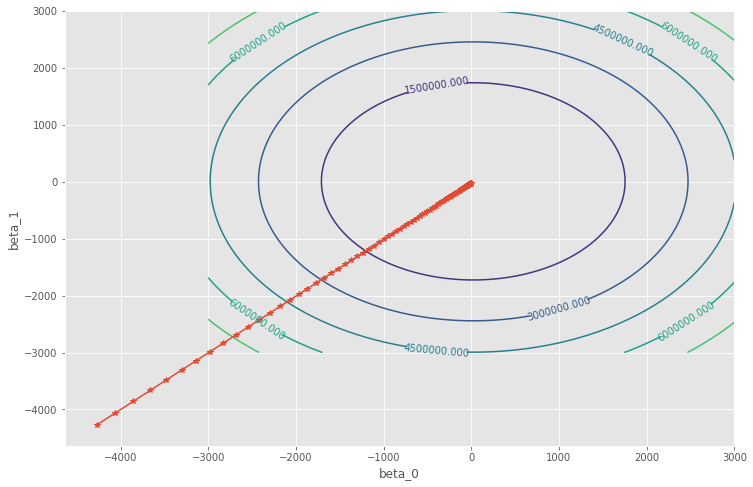

In [38]:
beta0 = np.linspace(-3000 , 3000, 100)
beta1 = np.linspace(-3000, 3000, 100)

B0, B1= np.meshgrid(beta0, beta1)

B_all = np.c_[B0.reshape(-1,1), B1.reshape(-1,1)].T

L = X_model.dot(B_all) - y_train.reshape(-1,1)
L = L ** 2
L = L.mean(axis=0)/2
L = L.reshape(B0.shape)

fig, ax = plt.subplots(1,1)
contour = ax.contour(B0, B1, L)
plt.clabel(contour, inline=1, fontsize=10)
ax.set_xlabel('beta_0')
ax.set_ylabel('beta_1')

betas = np.array(betas)
ax.plot(betas[:,0], betas[:,1], marker='*')


### Questions for students
* Why sometimes use adaptive learning rate
* What different stop criteria can they offer

## Outliers

Squared error is very sensitive to outliers...

In [39]:
X_train = df_train.RM.values.reshape(-1, 1)
y_train = df_train.MEDV.values
n = y_train.shape[0]

In [40]:
## Add random outliers
for i in range(10):
    X_train = np.r_[X_train, [[np.random.rand()*20]]]
    y_train = np.r_[y_train, np.random.randn()*10]

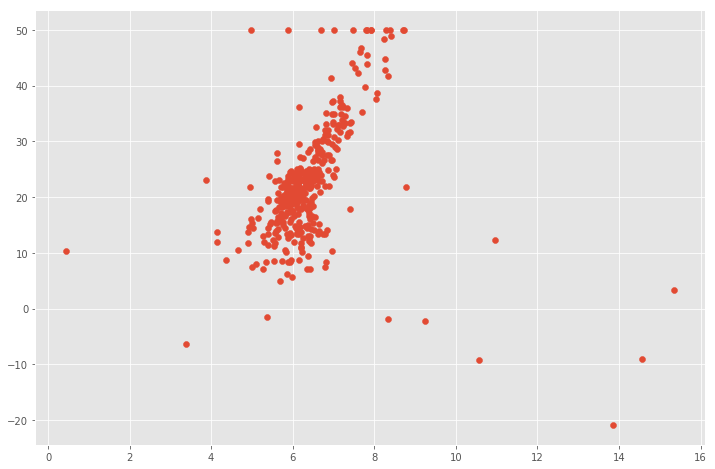

In [41]:
plt.scatter(X_train, y_train)

In [42]:
model = LinearRegression(fit_intercept=True)
model.fit(X_train[:n], y_train[:n])

model_ouliers = LinearRegression(fit_intercept=True)
model_ouliers.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

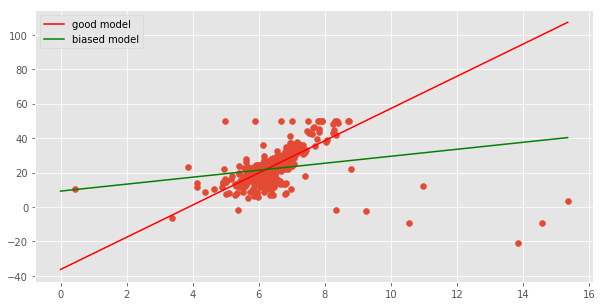

In [43]:
x = np.linspace(0, max(X_train), 100).reshape(-1, 1)
y_hat = model.predict(x)
y_hat_outliers = model_ouliers.predict(x)

fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax.scatter(X_train, y_train)

ax.plot(x, y_hat, c='red', label='good model')
ax.plot(x, y_hat_outliers, c='green', label='biased model')
plt.legend()

### RANSAC регрессия

Idea of RANdom SAmple Consensus (RANSAC) is based in learing a sequence of models on random objects. Since outliers are rare, it is not likely that many of them would be sampled

Determine:
* Loss function
* Threshold $\theta$ 
* Stopping rule

Steps
1. Sample random K object and train model M
2. Compare residuals with $\theta$ and assign objects to outliers or inner objects
3. Train model on inner objects
4. Repear 1-3 until stopped

In [44]:
from sklearn.linear_model import RANSACRegressor

In [45]:
model_ransac = RANSACRegressor(LinearRegression())
model_ransac.fit(X_train, y_train)

RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
        is_data_valid=None, is_model_valid=None, loss='absolute_loss',
        max_skips=inf, max_trials=100, min_samples=None, random_state=None,
        residual_metric=None, residual_threshold=None, stop_n_inliers=inf,
        stop_probability=0.99, stop_score=inf)

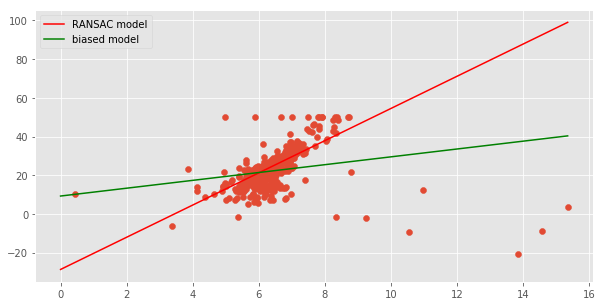

In [46]:
x = np.linspace(0, max(X_train), 100).reshape(-1, 1)
y_hat = model_ransac.predict(x)

fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax.scatter(X_train, y_train)

ax.plot(x, y_hat, c='red', label='RANSAC model')
ax.plot(x, y_hat_outliers, c='green', label='biased model')
plt.legend()

### Robust Estimators

Instead of $$ L(\beta_0,\beta_1,\dots) = \frac{1}{2N}\sum^{N}_{n=1}(\hat{y}_n - y_n)^2$$
Minimize weighted criterion $$ L_w(\beta_0,\beta_1,\dots) = \frac{1}{2N}\sum^{N}_{n=1}\rho_i(\hat{y}_n - y_n)^2,$$
where $\rho_i$ is sample $x_i$ weight based on its residuals

Need to install `statsmodels` with `pip`

In [47]:
!pip install statsmodels

You are using pip version 19.0.1, however version 19.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [48]:
import statsmodels.api as sm

/home/radi4/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


(0.1, -4.1)

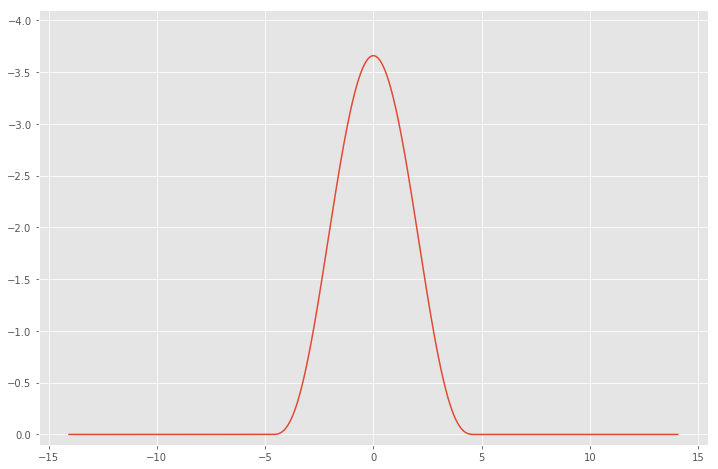

In [49]:
c = 4.685
support = np.linspace(-3*c, 3*c, 1000)
tukey = sm.robust.norms.TukeyBiweight(c=c)
plt.plot(support, tukey(support))
plt.ylim(.1, -4.1)

In [50]:
model_robust = sm.RLM(y_train, sm.add_constant(X_train), M=sm.robust.norms.TukeyBiweight())
model_robust = model_robust.fit()

In [51]:
model_robust.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                      y   No. Observations:                  414
Model:                            RLM   Df Residuals:                      412
Method:                          IRLS   Df Model:                            1
Norm:                   TukeyBiweight                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 09 Feb 2019                                         
Time:                        23:50:47                                         
No. Iterations:                    19                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -43.4803      1.486    -29.263      0.000     -46.393     -40.568
x1            10.5244      0.229     45.901      0.000      10.075      10.974
==============================================================================

If the model instance has been used for another fit with different fit
parameters, then the fit options might not be the correct ones anymore .
"""

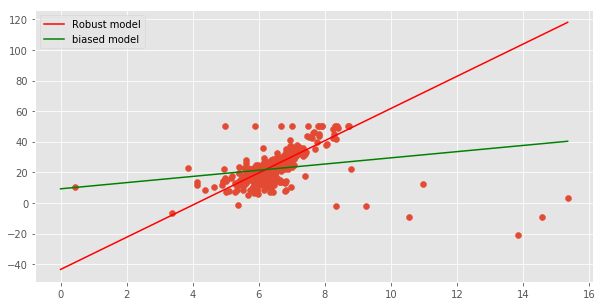

In [52]:
x = np.linspace(0, max(X_train), 100).reshape(-1, 1)
y_hat = model_robust.predict(sm.add_constant(x))

fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax.scatter(X_train, y_train)

ax.plot(x, y_hat, c='red', label='Robust model')
ax.plot(x, y_hat_outliers, c='green', label='biased model')
plt.legend()

### Some usefull formulas

Linear regression with MSE error has got analytical solution

Find $w$:
$$
f(w) = ||y - X \cdot w||^2 \rightarrow \min
$$

Let's cal derivative
$$
f(w) = ||y - X \cdot w||^2 = \langle y - X \cdot w, y - X \cdot w \rangle = ||y||^2 - 2 \langle y, X \cdot w \rangle + ||X \cdot w ||^2
$$

$$
\frac{\partial f}{\partial w} = \frac{\partial \left[||X \cdot w ||^2 - 2\langle y, X \cdot w \rangle\right]}{\partial w} = 0
$$

We use $\frac{\partial A w}{\partial w} = A$

$$
\frac{\partial ||X \cdot w ||^2}{\partial w} = \frac{\partial \langle X w, X w \rangle}{\partial w} = \frac{\partial \left[w^t X^T X w\right]}{\partial w} = 2 w^t X^T X
$$

$$
\frac{\partial \langle y, X w \rangle}{\partial w} = \frac{\partial y^t X w}{\partial w} = y^t X 
$$

We have
$$
\frac{\partial f}{\partial w} = 2 w^t X^T X - 2y^t X = 0 \rightarrow (transpose ~ everything) ~ X^T X w = X^T y \rightarrow w = \left(X^TX\right)^{-1}X^Ty
$$

Everything is good, but what if $X^TX$ is degenerate matrix? 